# Nicholas Shinn Project 2

# Part 1

### Problem 1:

In [1]:
import sqlite3
import pandas as pd

sqlite_file = 'lahman2014.sqlite'
conn = sqlite3.connect(sqlite_file)

teams_payroll_win = "SELECT Salaries.teamID as team_ID, W, G, 100.00*W/G as win_percent, SUM(salary) as total_salary, Teams.yearID FROM Salaries LEFT JOIN Teams ON Teams.teamID = Salaries.teamID GROUP BY Teams.teamID"

team_salaries = pd.read_sql(teams_payroll_win, conn)
team_salaries.fillna(0)

,team_ID,W,G,win_percent,total_salary,yearID
0,SFG,0.0,0.0,0.000000,1.983172e+08,0.0
1,ANA,92.0,162.0,56.790123,3.744736e+09,2004.0
2,ARI,64.0,162.0,39.506173,2.056958e+10,2014.0
3,ATL,79.0,162.0,48.765432,9.226439e+10,2014.0
4,BAL,96.0,162.0,59.259259,9.944220e+10,2014.0
5,BOS,71.0,162.0,43.827160,2.773279e+11,2014.0
6,CAL,70.0,161.0,43.478261,8.703326e+09,1996.0
7,CHA,73.0,162.0,45.061728,1.937846e+11,2014.0
8,CHN,73.0,162.0,45.061728,2.585168e+11,2014.0
9,CIN,76.0,162.0,46.913580,1.793469e+11,2014.0


The data was extracted from the sqlite file that has already been uploded to the juypter notebook. Then the connector extracts the data using the sqlite package that was imported. Then pandas.read_sql was used to read the query and collect the data from the Teams and Salaries tables. The query selects the columns of data from each table and LEFT JOINS from the Salaries table to include all the listed teamIDs. The win percentage is calculated from 100.00*(Number of Wins)/(Number of Games). 100.00 is used to return a floating point percentage value. Lastly, the missing salary statistics are replaced with 0 using pandas.fillna(0).

# Part 2

### Problem 2:

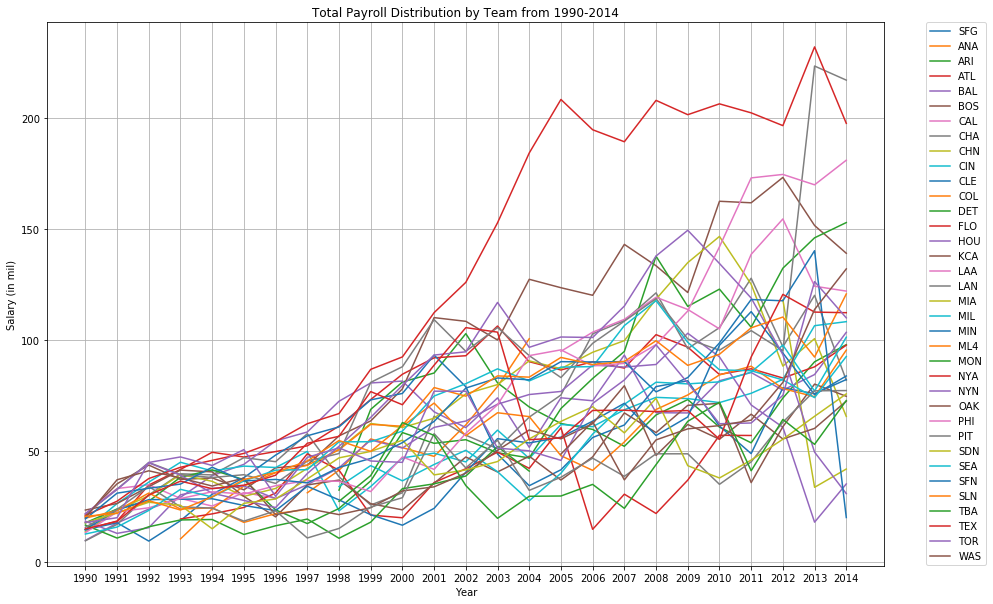

In [2]:
import matplotlib.pylab as plt
import numpy as np

plt.figure(figsize=(15,10))
plt.xlabel('Year')
plt.ylabel('Salary (in mil)')
plt.title('Total Payroll Distribution by Team from 1990-2014')
plt.xticks(np.arange(1990, 2015))
           
# itertuples is faster and allows accessing column values    
for row in team_salaries.itertuples():
    team_name = row.team_ID
    query = "SELECT yearID, SUM(salary) as total_salary FROM Salaries WHERE yearID >= 1990 and yearID <= 2014 and teamID = '"+team_name+"' GROUP BY yearID"
    current_team = pd.read_sql(query, conn)
    plt.plot(current_team.yearID, current_team.total_salary/1000000.0, label=team_name)

plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In this section the matplotlib.pylab was used to plot the data from the Salaries table. The table was first instantiated and labeled with the appropriate attributes. Numpy was used to set the range of the year ticks on the x-axis. To extract the payroll data per year for each team, I first iterated over the list of teams from the previous dataframe. Then for each team, I query the salary data grouped by year and plot the line onto the pylab plot. Each line was colored differently (to the limited color availability) to distinguish the different teams' total payroll over the years.

### Question 1:

Looking at the plot, it is clear that the average payroll across all the teams have increased over the years from 1990 to 2014. In addition to the mean increasing, the variance and spread of the data increased dramatically following 2002. This lead to more outliers in the data set.

### Problem 3:

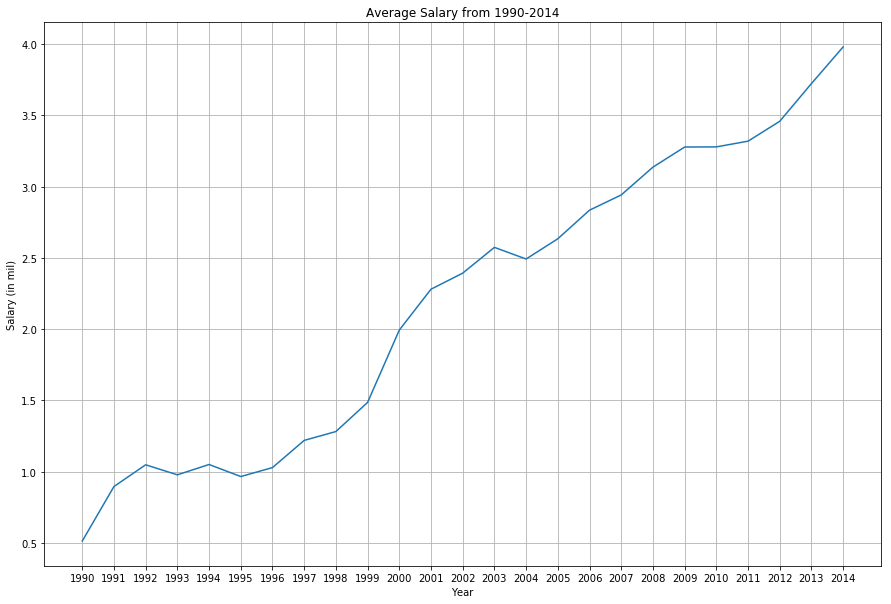

In [3]:
plt.figure(figsize=(15,10))
plt.xlabel('Year')
plt.ylabel('Salary (in mil)')
plt.title('Average Salary from 1990-2014')
plt.xticks(np.arange(1990, 2015))

team_name = row.team_ID
query = "SELECT yearID, AVG(salary) as avg_salary FROM Salaries WHERE yearID >= 1990 and yearID <= 2014 GROUP BY yearID"
current_team = pd.read_sql(query, conn)
plt.grid(True)
plt.plot(current_team.yearID, current_team.avg_salary/1000000.0)

plt.show()

As stated previously, it was observed that the average payroll among all the teams had a tendency to increase over the years. This plot explicitly shows the increase in average salary among all the teams per year. The AVG(salary) was queried as opposed to the SUM(salary).

### Problem 4:

The code above creates 5 different subplots that contain the win percentages and average salaries from the database. Each section represents a different time period out of five total partitions from 1990-2014. The points on each subplot represent each team during each of the five time periods and show the average salary by the average winning percentage of that team.

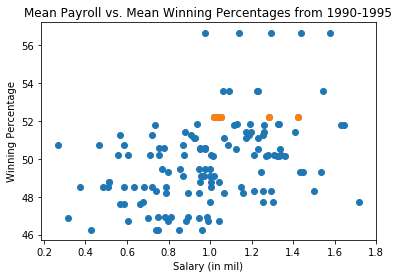

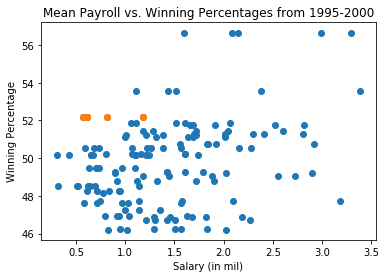

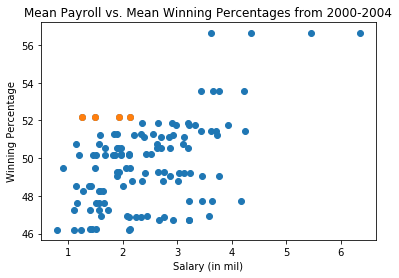

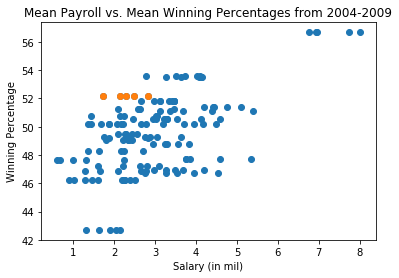

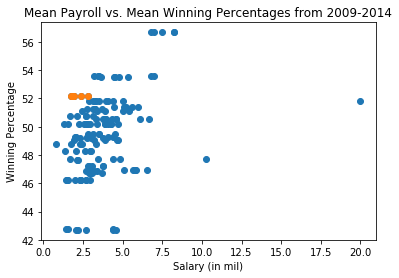

In [4]:
# I apologize in advance for the tremendous amount of repeated code (working alone has its cons)

plt.figure(0)
plt.title('Mean Payroll vs. Mean Winning Percentages from 1990-1995')
plt.ylabel('Winning Percentage')
plt.xlabel('Salary (in mil)')
query = "SELECT Teams.teamID as team_ID, Salaries.YearID, AVG(100.00*W/G) as win_percent, AVG(salary) as mean_salary FROM Salaries LEFT JOIN Teams ON Teams.teamID = Salaries.teamID WHERE Salaries.yearID > 1990 and Salaries.yearID <= 1995 GROUP BY Salaries.yearID, Teams.teamID"
current_time_period = pd.read_sql(query, conn)
plt.scatter(current_time_period.mean_salary/1000000.0, current_time_period.win_percent)

oakland_data = current_time_period[(current_time_period.team_ID == 'OAK')]
plt.scatter(oakland_data.mean_salary/1000000.0, oakland_data.win_percent)

plt.figure(1)
plt.title('Mean Payroll vs. Winning Percentages from 1995-2000')
plt.ylabel('Winning Percentage')
plt.xlabel('Salary (in mil)')
query = "SELECT Teams.teamID as team_ID, Salaries.YearID, AVG(100.00*W/G) as win_percent, AVG(salary) as mean_salary FROM Salaries LEFT JOIN Teams ON Teams.teamID = Salaries.teamID WHERE Salaries.yearID > 1995 and Salaries.yearID <= 2000 GROUP BY Salaries.yearID, Teams.teamID"
current_time_period = pd.read_sql(query, conn)
plt.scatter(current_time_period.mean_salary/1000000.0, current_time_period.win_percent)

oakland_data = current_time_period[(current_time_period.team_ID == 'OAK')]
plt.scatter(oakland_data.mean_salary/1000000.0, oakland_data.win_percent)

plt.figure(2)
plt.title('Mean Payroll vs. Mean Winning Percentages from 2000-2004')
plt.ylabel('Winning Percentage')
plt.xlabel('Salary (in mil)')
query = "SELECT Teams.teamID as team_ID, Salaries.YearID, AVG(100.00*W/G) as win_percent, AVG(salary) as mean_salary FROM Salaries LEFT JOIN Teams ON Teams.teamID = Salaries.teamID WHERE Salaries.yearID > 2000 and Salaries.yearID <= 2004 GROUP BY Salaries.yearID, Teams.teamID"
current_time_period = pd.read_sql(query, conn)
plt.scatter(current_time_period.mean_salary/1000000.0, current_time_period.win_percent)

oakland_data = current_time_period[(current_time_period.team_ID == 'OAK')]
plt.scatter(oakland_data.mean_salary/1000000.0, oakland_data.win_percent)

plt.figure(3)
plt.title('Mean Payroll vs. Mean Winning Percentages from 2004-2009')
plt.ylabel('Winning Percentage')
plt.xlabel('Salary (in mil)')
query = "SELECT Teams.teamID as team_ID, Salaries.yearID, AVG(100.00*W/G) as win_percent, AVG(salary) as mean_salary FROM Salaries LEFT JOIN Teams ON Teams.teamID = Salaries.teamID WHERE Salaries.yearID > 2004 and Salaries.yearID <= 2009 GROUP BY Salaries.yearID, Teams.teamID"
current_time_period = pd.read_sql(query, conn)
plt.scatter(current_time_period.mean_salary/1000000.0, current_time_period.win_percent)

oakland_data = current_time_period[(current_time_period.team_ID == 'OAK')]
plt.scatter(oakland_data.mean_salary/1000000.0, oakland_data.win_percent)

plt.figure(4)
plt.title('Mean Payroll vs. Mean Winning Percentages from 2009-2014')
plt.ylabel('Winning Percentage')
plt.xlabel('Salary (in mil)')
query = "SELECT Teams.teamID as team_ID, Salaries.yearID, AVG(100.00*W/G) as win_percent, AVG(salary) as mean_salary FROM Salaries LEFT JOIN Teams ON Teams.teamID = Salaries.teamID WHERE Salaries.yearID > 2009 and Salaries.yearID <= 2014 GROUP BY Salaries.yearID, Teams.teamID"
current_time_period = pd.read_sql(query, conn)
plt.scatter(current_time_period.mean_salary/1000000.0, current_time_period.win_percent)

oakland_data = current_time_period[(current_time_period.team_ID == 'OAK')]
plt.scatter(oakland_data.mean_salary/1000000.0, oakland_data.win_percent)

plt.show()

### Question 2:

Given the scatter plots of the mean salary by mean winning percentages I can say that as years went by, the correlation between mean salary and win percentage has decreased. This means that teams are spending less money on their players and still maintaining or improving their win percentages. There are, however, outliers that continue to spend far above the mean salary among all the teams yet still maintain a high average win percentage. The Oakland A's from 1990-200 were efficient with their spending because the graphs show a strong positive trend in spending and win percentage. During the 2000 time period they experienced their worst spending effiency. Overall, the Oakland A's (Colored in oragne) were able to maintain a fairly consistent average win percentage without increasing spending. 

# Part 3

### Problem 5:

In [5]:
query = "SELECT Teams.teamID as team_ID, Salaries.yearID, AVG(100.00*W/G) as win_percent, AVG(salary) as mean_salary FROM Salaries LEFT JOIN Teams ON Teams.teamID = Salaries.teamID WHERE Salaries.yearID >= 1990 and Salaries.yearID <= 2014 GROUP BY Salaries.yearID, Teams.teamID"
standard_salaries = pd.read_sql(query, conn)
year_payroll = pd.read_sql("SELECT yearID, AVG(salary) as mean_salary FROM Salaries WHERE yearID >= 1990 and yearID <= 2014 GROUP BY yearID", conn)

new_col = []

for row in standard_salaries.iterrows():
    team_salary = row[1]['mean_salary']
    yearID = row[1]['yearID']
    year_salary = year_payroll.loc('yearID' == yearID)[0][1]
    sd = np.std(standard_salaries[standard_salaries['yearID'] == yearID]['mean_salary'])
    if (sd != 0):
        standard_salary = (team_salary-year_salary)/sd
    else:
        standard_salary = 0
    new_col.append(standard_salary)

standard_salaries['standard_salary'] = new_col
standard_salaries

,team_ID,yearID,win_percent,mean_salary,standard_salary
0,ATL,1990,51.782555,4.548594e+05,-0.505638
1,BAL,1990,51.260522,2.616239e+05,-2.216369
2,BOS,1990,51.427450,6.424479e+05,1.155100
3,CAL,1990,48.171550,6.205714e+05,0.961425
4,CHA,1990,50.195230,3.061774e+05,-1.821932
5,CHN,1990,51.115255,4.394839e+05,-0.641759
6,CIN,1990,50.171196,4.226471e+05,-0.790816
7,CLE,1990,50.751170,4.390000e+05,-0.646042
8,DET,1990,50.542937,5.331284e+05,0.187285
9,HOU,1990,48.791374,5.912903e+05,0.702197


This code snippet queries all the average salaries per team by year and iterates through each combination of Team x Year to calculate the standardized payroll value for each team in each year. The yearly averages for the payroll data is retrieved from another sql query that calculates the mean for each year. The new standard salary data are then appended to the table after every iteration of the for loop.

### Problem 6:

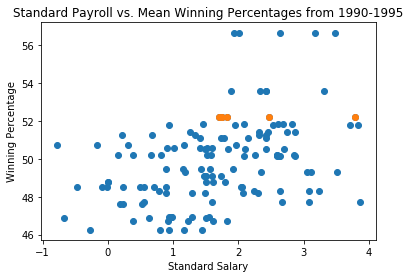

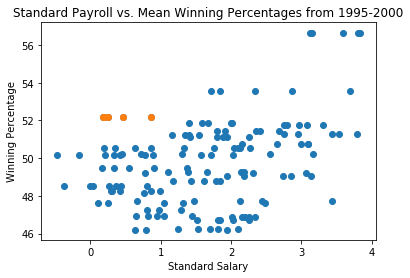

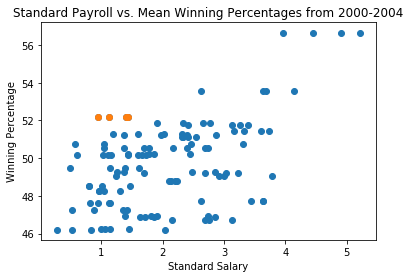

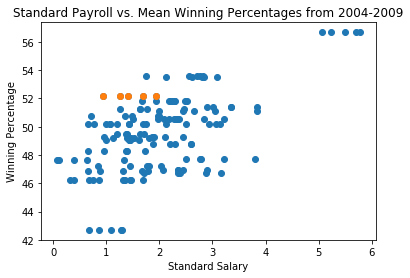

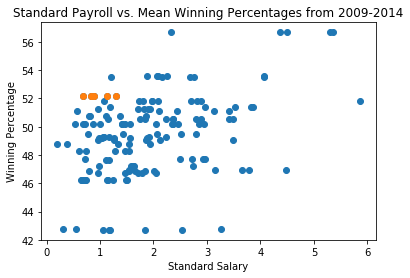

In [6]:
plt.figure(0)
plt.title('Standard Payroll vs. Mean Winning Percentages from 1990-1995')
plt.ylabel('Winning Percentage')
plt.xlabel('Standard Salary')
standard_salary_year = standard_salaries.loc[(standard_salaries['yearID'] > 1990) & (standard_salaries['yearID'] <= 1995)]['standard_salary']
win_percent_year = standard_salaries.loc[(standard_salaries['yearID'] > 1990) & (standard_salaries['yearID'] <= 1995)]['win_percent']
plt.scatter(standard_salary_year, win_percent_year)

oakland_data = standard_salaries[(standard_salaries.team_ID == 'OAK') & (standard_salaries.yearID > 1990) & (standard_salaries.yearID <= 1995)]
plt.scatter(oakland_data.standard_salary, oakland_data.win_percent)

plt.figure(1)
plt.title('Standard Payroll vs. Mean Winning Percentages from 1995-2000')
plt.ylabel('Winning Percentage')
plt.xlabel('Standard Salary')
standard_salary_year = standard_salaries.loc[(standard_salaries['yearID'] > 1995) & (standard_salaries['yearID'] <= 2000)]['standard_salary']
win_percent_year = standard_salaries.loc[(standard_salaries['yearID'] > 1995) & (standard_salaries['yearID'] <= 2000)]['win_percent']
plt.scatter(standard_salary_year, win_percent_year)

oakland_data = standard_salaries[(standard_salaries.team_ID == 'OAK') & (standard_salaries.yearID > 1995) & (standard_salaries.yearID <= 2000)]
plt.scatter(oakland_data.standard_salary, oakland_data.win_percent)

plt.figure(2)
plt.title('Standard Payroll vs. Mean Winning Percentages from 2000-2004')
plt.ylabel('Winning Percentage')
plt.xlabel('Standard Salary')
standard_salary_year = standard_salaries.loc[(standard_salaries['yearID'] > 2000) & (standard_salaries['yearID'] <= 2004)]['standard_salary']
win_percent_year = standard_salaries.loc[(standard_salaries['yearID'] > 2000) & (standard_salaries['yearID'] <= 2004)]['win_percent']
plt.scatter(standard_salary_year, win_percent_year)

oakland_data = standard_salaries[(standard_salaries.team_ID == 'OAK') & (standard_salaries.yearID > 2000) & (standard_salaries.yearID <= 2004)]
plt.scatter(oakland_data.standard_salary, oakland_data.win_percent)

plt.figure(3)
plt.title('Standard Payroll vs. Mean Winning Percentages from 2004-2009')
plt.ylabel('Winning Percentage')
plt.xlabel('Standard Salary')
standard_salary_year = standard_salaries.loc[(standard_salaries['yearID'] > 2004) & (standard_salaries['yearID'] <= 2009)]['standard_salary']
win_percent_year = standard_salaries.loc[(standard_salaries['yearID'] > 2004) & (standard_salaries['yearID'] <= 2009)]['win_percent']
plt.scatter(standard_salary_year, win_percent_year)

oakland_data = standard_salaries[(standard_salaries.team_ID == 'OAK') & (standard_salaries.yearID > 2004) & (standard_salaries.yearID <= 2009)]
plt.scatter(oakland_data.standard_salary, oakland_data.win_percent)

plt.figure(4)
plt.title('Standard Payroll vs. Mean Winning Percentages from 2009-2014')
plt.ylabel('Winning Percentage')
plt.xlabel('Standard Salary')
standard_salary_year = standard_salaries.loc[(standard_salaries['yearID'] > 2009) & (standard_salaries['yearID'] <= 2014)]['standard_salary']
win_percent_year = standard_salaries.loc[(standard_salaries['yearID'] > 2009) & (standard_salaries['yearID'] <= 2014)]['win_percent']
plt.scatter(standard_salary_year, win_percent_year)

oakland_data = standard_salaries[(standard_salaries.team_ID == 'OAK') & (standard_salaries.yearID > 2009) & (standard_salaries.yearID <= 2014)]
plt.scatter(oakland_data.standard_salary, oakland_data.win_percent)

plt.show()

In the code snippet above, I demonstrate a different method of querying data. Rather than querying specific values and rows straight from the SQL database, I load the data into a pandas data frame, then calculate the standardized salary before appending it to the table. Finally, I query data by time frames directly from the data frame to plot the scatter plots for each of the 5 time frames.

### Question 3:

The standardization of the salary attribute made the graphs more clear in terms of spotting trends and correlation. The plots from the unstandardized salaries seemed scattered and it seemed as if there were many outliers. After standardizing the salaries and measuring the metrics around the sample mean, the data became more tidy and the correlation (or lack thereof) was easier to point out. Looking further into the standardized data it is easier to spot out the number of teams that spent more on the players during the moneyball period but did not experience the expected win percentage increase. By looking at the standardized plots, I can see that the Oakland A's we're able to maintain their win percentage without having to increase their payroll relative to the other teams.

### Problem 7:

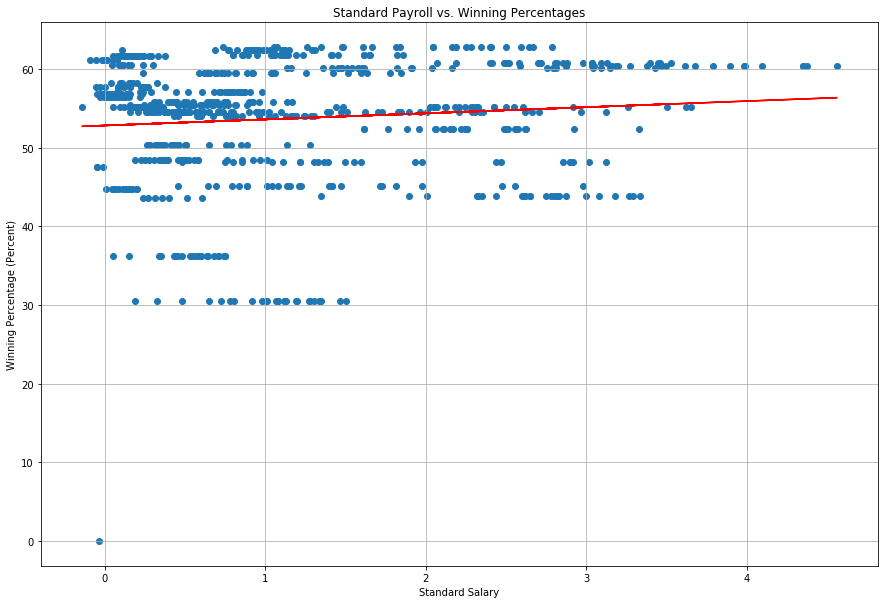

In [7]:
query = "SELECT Teams.teamID as team_ID, Salaries.yearID, 100.00*W/G as win_percent, SUM(salary) as total_salary FROM Salaries LEFT JOIN Teams ON Teams.teamID = Salaries.teamID WHERE Salaries.yearID >= 1990 and Salaries.yearID <= 2014 GROUP BY Salaries.yearID, Teams.teamID"
total_standard_salaries = pd.read_sql(query, conn)
year_payroll = pd.read_sql("SELECT yearID, SUM(salary) as total_salary FROM Salaries WHERE yearID >= 1990 and yearID <= 2014 GROUP BY yearID", conn)

new_col = []
for row in total_standard_salaries.iterrows():
    team_salary = row[1]['total_salary']
    yearID = row[1]['yearID']
    year_salary = year_payroll.loc('yearID' == yearID)[0][1]
    sd = np.std(total_standard_salaries[total_standard_salaries['yearID'] == yearID]['total_salary'])
    if (sd != 0):
        standard_salary = (team_salary-year_salary)/sd
    else:
        standard_salary = 0
    new_col.append(standard_salary)

total_standard_salaries['standard_salary'] = new_col

plt.figure(figsize=(15,10))
plt.title('Standard Payroll vs. Winning Percentages')
plt.xlabel('Standard Salary')
plt.ylabel('Winning Percentage (Percent)')
x = total_standard_salaries.standard_salary.fillna(0)
y = total_standard_salaries.win_percent.fillna(0)

fit = np.polyfit(x, y, deg=1)
plt.plot(x, fit[0] * x + fit[1], color='red')
plt.scatter(x, y)

plt.grid(True)
plt.show()

The code snippet above re-queries data from the database, but this time it queries ALL the win percentages and salaries for each team over the years 1990-2014. The salaries are standardized then placed into a pandas dataframe using iterrows. Numpy polyfit is used to calculate the linear regression fit for the standard salary and win percentage metrics then the data is plotted as a scatter plot. The x and y variables must contain non-NaN values in order for polyfit to return a valid float.

### Problem 8:

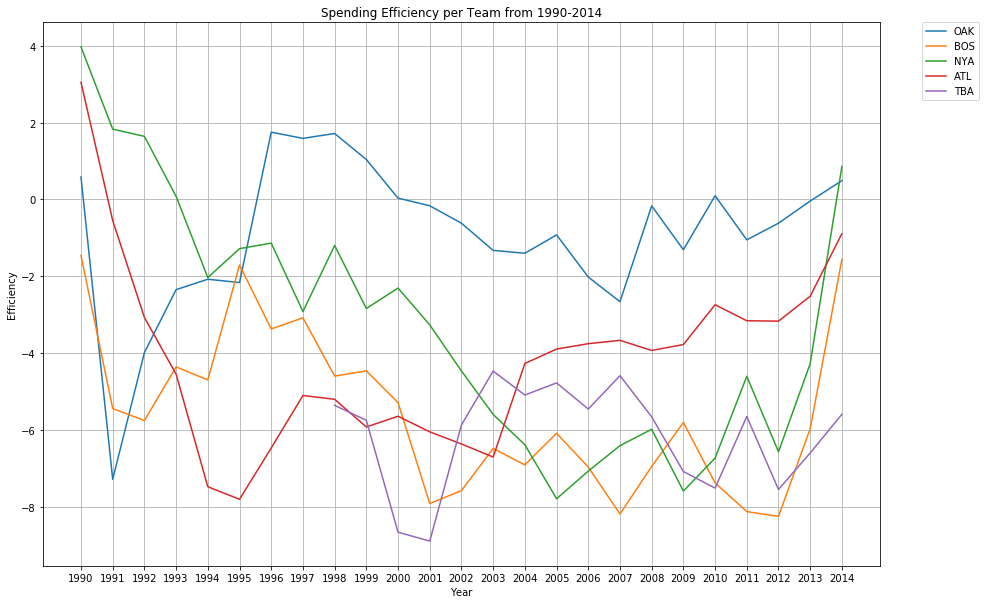

In [8]:
teams_to_plot = ["OAK", "BOS", "NYA", "ATL", "TBA"]

new_col = []
for row in standard_salaries.iterrows():
    win_percentage = row[1]['win_percent']
    yearID = row[1]['yearID']
    standard_payroll = row[1]['standard_salary']
    efficiency = win_percentage - (50 + (2.5 * standard_payroll))
    new_col.append(efficiency)

standard_salaries['efficiency'] = new_col

plt.figure(figsize=(15,10))
plt.xlabel('Year')
plt.ylabel('Efficiency')
plt.title('Spending Efficiency per Team from 1990-2014')
plt.xticks(np.arange(1990, 2015))
            
for team in teams_to_plot:
    team_data = standard_salaries.loc[(standard_salaries['team_ID'] == team)]
    plt.plot(team_data.yearID, team_data.efficiency, label=team)

plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In the code snippet above, I first predefined an array of the teams to be analyzed for this question. Then I added a new column called efficiency and appended it to each row in the "standard_salaries" table. I used the formula efficiency = win_percent - (50+(2.5*standard_payroll)) in order to calculate the spending efficiency for each team for each year. Then I plotted lines of Efficiency by year for each team from 1990-2014 by iterating over the teams_to_plot array and using plt.plot()

### Question 4:

From this graph, I can visualize the spending efficiency of each team over each year. The general trend of the efficiency decreases starting at 1990, but as the year 2003~ passes, the efficiency tends to increase among the five selected teams. Overall, the spread of the data is pretty consistent throughout the years. Compared to the previous plots, this graph clearly shows how the Oakland A's were able to increase their win percentage without spending more money based on the standardized payroll scale among the teams. During the moneyball period, the Oakland A's held the highest spending efficiency out of all five teams that were being compared. Although the spending efficiency of OAK from 1996-2007 decreased, OAK was still able to beat out the other five teams in terms of their player-picking ability. From this project I was able to discover how much of an influence statistical modelling and data analysis can have on outside topics, like sports. The Oakland A's were able to utilize their statistical data in order to make money-saving business decisions and ultimately boost their win percentage and ranking. 